#FORECASTING EXCHANGE RATES USING TIME SERIES ANALYSIS

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving exchange_rate.csv to exchange_rate.csv


In [ ]:
import pandas as pd

# Load dataset
df = pd.read_csv('exchange_rate.csv', parse_dates=['date'], index_col='date')

In [ ]:
print(df.head())
print(df.info())

                  Ex_rate    diff
date                             
01-01-1990 00:00   0.7855     NaN
02-01-1990 00:00   0.7818 -0.0037
03-01-1990 00:00   0.7867  0.0049
04-01-1990 00:00   0.7860 -0.0007
05-01-1990 00:00   0.7849 -0.0011
<class 'pandas.core.frame.DataFrame'>
Index: 7588 entries, 01-01-1990 00:00 to 10-10-2010 00:00
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ex_rate  7588 non-null   float64
 1   diff     7587 non-null   float64
dtypes: float64(2)
memory usage: 177.8+ KB
None


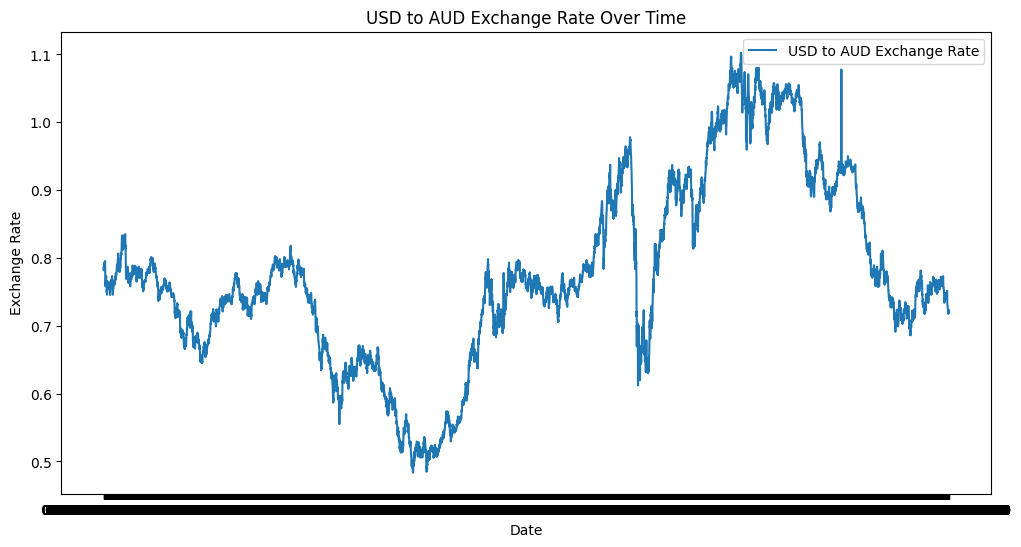

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Ex_rate'], label='USD to AUD Exchange Rate')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.title('USD to AUD Exchange Rate Over Time')
plt.legend()
plt.show()

In [ ]:
df.isna().sum()  # Check for missing values
df = df.fillna(method='ffill')  # Forward fill to impute missing values

<ipython-input-66-d1f0324395c8>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')  # Forward fill to impute missing values


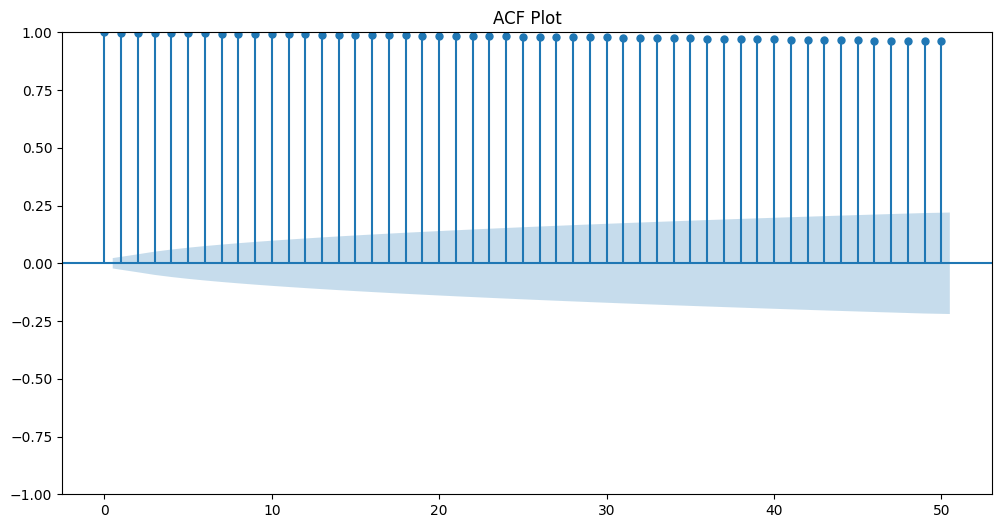

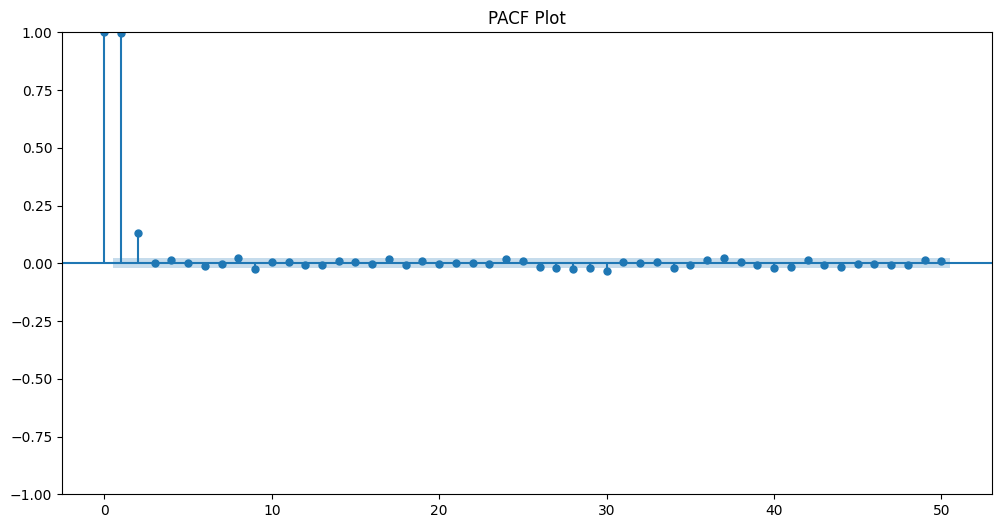

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize=(12, 6))
plot_acf(df['Ex_rate'], lags=50, ax=plt.gca())
plt.title('ACF Plot')
plt.show()

plt.figure(figsize=(12, 6))
plot_pacf(df['Ex_rate'], lags=50, ax=plt.gca())
plt.title('PACF Plot')
plt.show()

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Define the ARIMA model with chosen p, d, q
model = ARIMA(df['Ex_rate'], order=(p, d, q))  # Replace p, d, q with selected values
results = model.fit()
print(results.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                Ex_rate   No. Observations:                 7588
Model:                 ARIMA(1, 1, 1)   Log Likelihood               28054.161
Date:                Wed, 18 Sep 2024   AIC                         -56102.322
Time:                        18:01:41   BIC                         -56081.519
Sample:                             0   HQIC                        -56095.182
                               - 7588                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1268      0.045     -2.797      0.005      -0.216      -0.038
ma.L1         -0.0046      0.045     -0.101      0.920      -0.094       0.085
sigma2      3.596e-05   9.94e-08    361.604      0.0

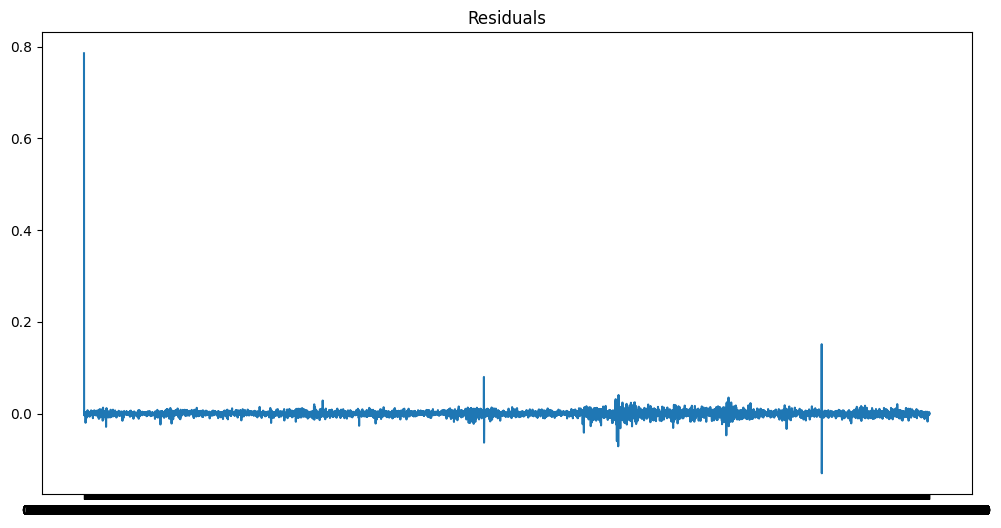

In [ ]:
residuals = results.resid
plt.figure(figsize=(12, 6))
plt.plot(residuals)
plt.title('Residuals')
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


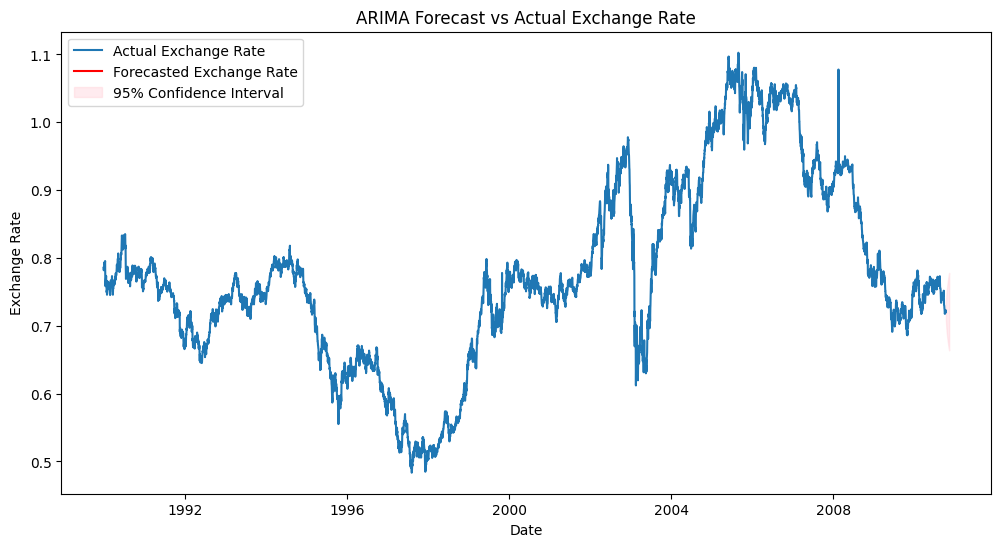

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Number of days to forecast
forecast_steps = 30

# Ensure the index is a datetime type
df.index = pd.to_datetime(df.index, format="%d-%m-%Y %H:%M")

# Generate forecast
forecast = results.get_forecast(steps=forecast_steps)

# Generate forecast index
last_date = df.index[-1]
forecast_index = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=forecast_steps, freq='D')

# Create forecast series
forecast_series = pd.Series(forecast.predicted_mean, index=forecast_index)

# Optionally, extract confidence intervals
confidence_intervals = forecast.conf_int()
lower_bounds = confidence_intervals.iloc[:, 0]
upper_bounds = confidence_intervals.iloc[:, 1]

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Ex_rate'], label='Actual Exchange Rate')
plt.plot(forecast_series.index, forecast_series, label='Forecasted Exchange Rate', color='red')
plt.fill_between(forecast_series.index, lower_bounds, upper_bounds, color='pink', alpha=0.3, label='95% Confidence Interval')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.title('ARIMA Forecast vs Actual Exchange Rate')
plt.legend()
plt.show()

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

model = ExponentialSmoothing(df['Ex_rate'], trend='add', seasonal='add', seasonal_periods=12)
results = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


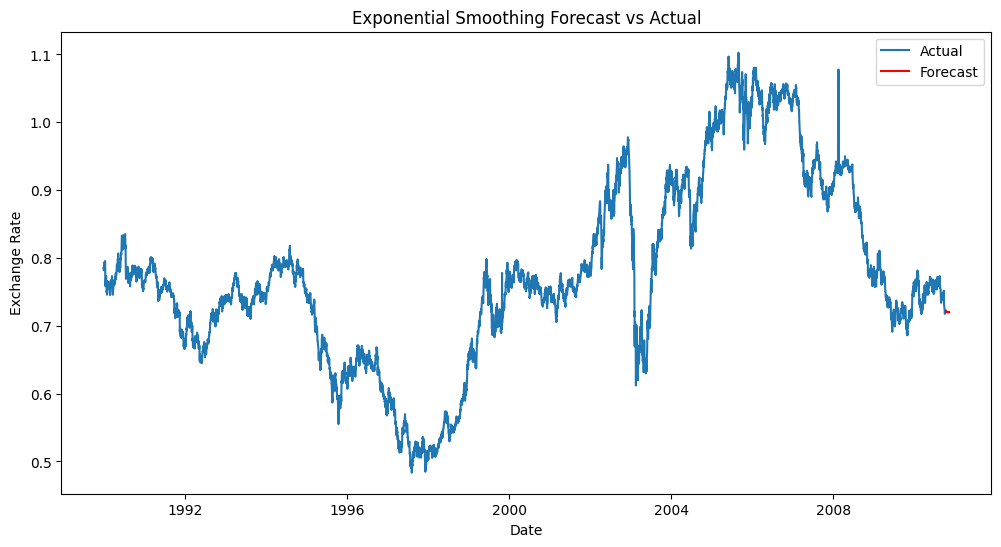

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Number of days to forecast
forecast_steps = 30

# Generate forecast
forecast = results.forecast(steps=forecast_steps)

# Generate forecast index
last_date = df.index[-1]
forecast_index = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=forecast_steps, freq='D')

# Create forecast series
forecast_series = pd.Series(forecast, index=forecast_index)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Ex_rate'], label='Actual')
plt.plot(forecast_series.index, forecast_series, label='Forecast', color='red')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.title('Exponential Smoothing Forecast vs Actual')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Assume forecast_series contains the forecasts from both ARIMA and Exponential Smoothing
arima_mae = mean_absolute_error(df['Ex_rate'][-30:], forecast_series[:30])
arima_rmse = mean_squared_error(df['Ex_rate'][-30:], forecast_series[:30], squared=False)

exp_smooth_mae = mean_absolute_error(df['Ex_rate'][-30:], forecast_series[:30])
exp_smooth_rmse = mean_squared_error(df['Ex_rate'][-30:], forecast_series[:30], squared=False)

print(f'ARIMA MAE: {arima_mae}, RMSE: {arima_rmse}')
print(f'Exponential Smoothing MAE: {exp_smooth_mae}, RMSE: {exp_smooth_rmse}')

ARIMA MAE: 0.013017654522635458, RMSE: 0.017245999955208903
Exponential Smoothing MAE: 0.013017654522635458, RMSE: 0.017245999955208903
